In [1]:
library("data.table")
library("qtl")

In [2]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "./new_subsets",
                    genfile="20190827_rqtl_f8_geno.csv",
                    phefile = "20190827_rqtl_f8_pheno.csv" )

 --Read the following data:
	 275  individuals
	 1013  markers
	 7  phenotypes
 --Cross type: f2 


In [3]:
summary(datf2)

    F2 intercross

    No. individuals:    275 

    No. phenotypes:     7 
    Percent phenotyped: 100 98.9 98.9 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  72.5 
    Genotypes (%):      AA:28.0  AB:45.2  BB:26.8  not BB:0.0  not AA:0.0 

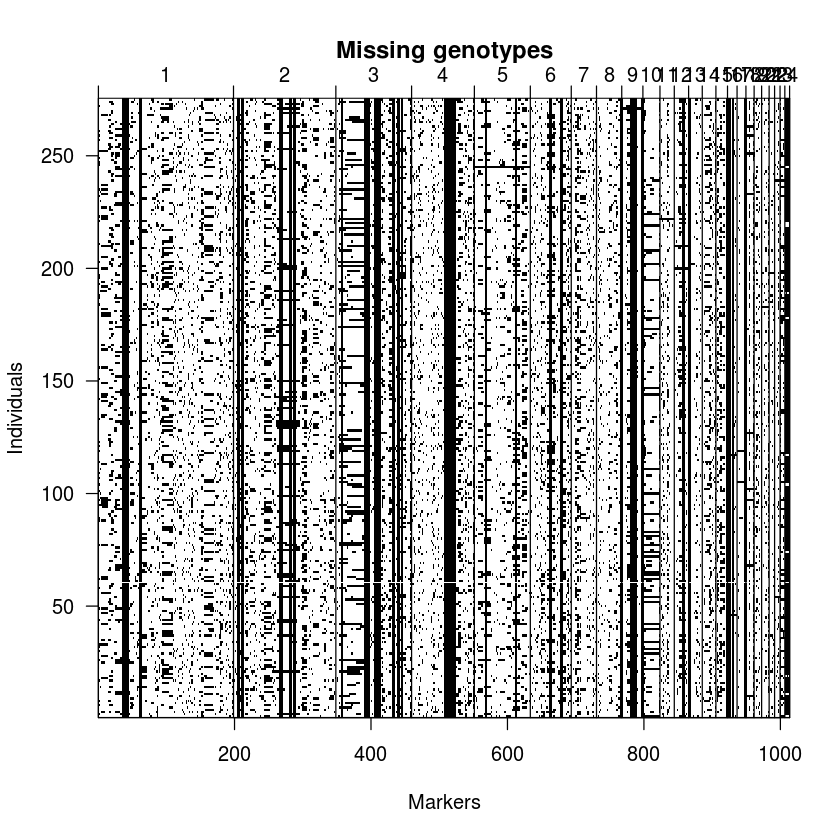

In [4]:
plotMissing(datf2)

In [ ]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [7]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 27]) # less than 10% of all markers


In [10]:
length(todrop)

[1] 150

In [11]:
datf2.1 <- drop.markers(datf2, todrop)

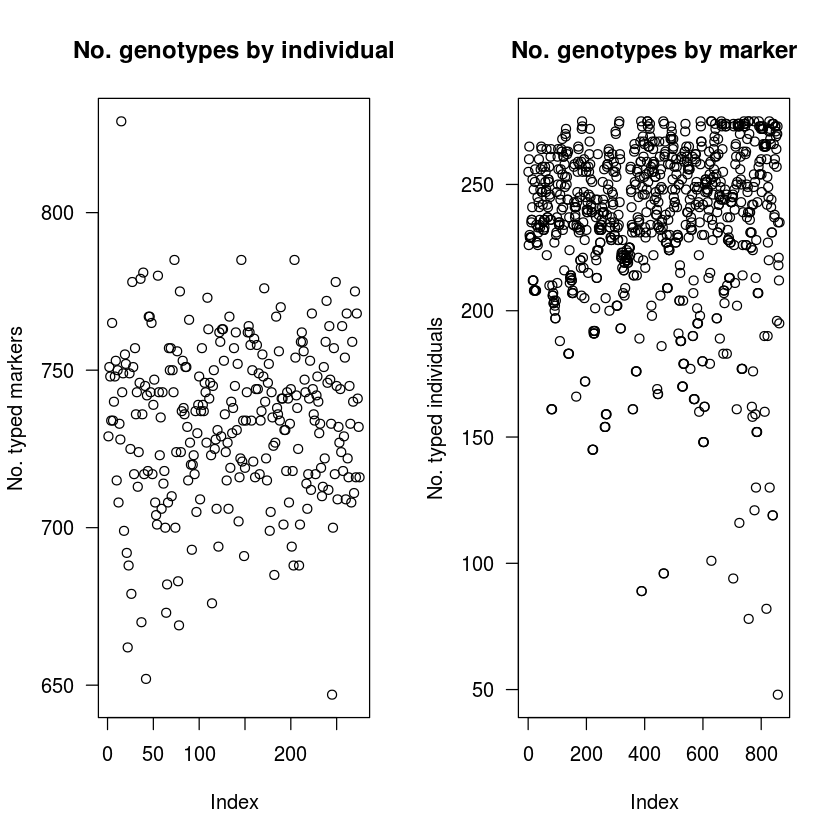

In [12]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [13]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [14]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 275

[1] 275

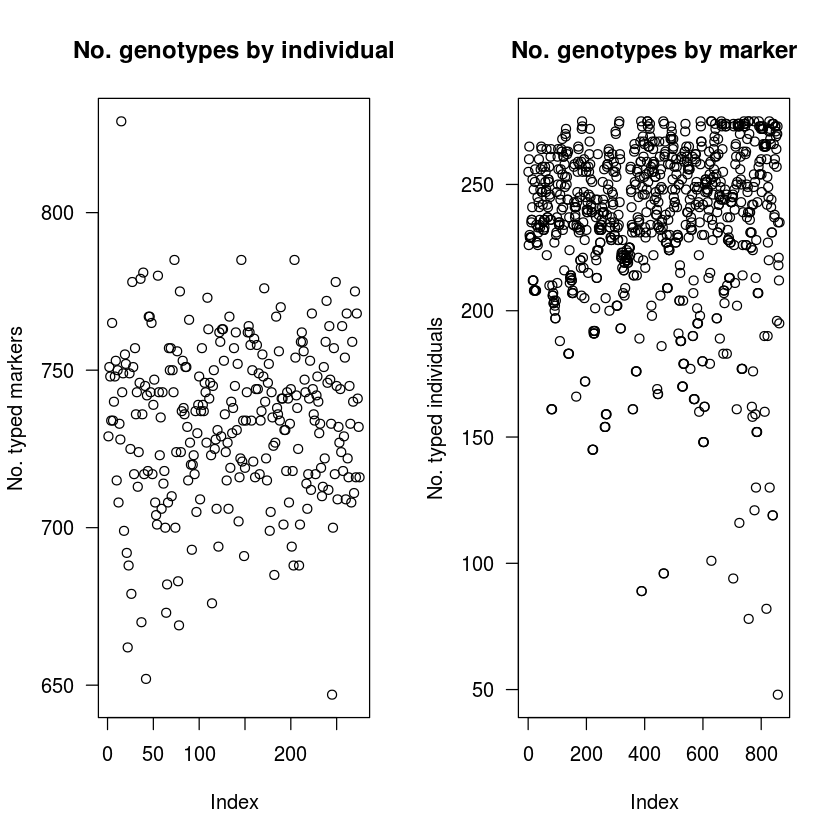

In [15]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [16]:
summary(datf2.2)

    F2 intercross

    No. individuals:    275 

    No. phenotypes:     7 
    Percent phenotyped: 100 98.9 98.9 100 100 100 100 

    No. chromosomes:    23 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 

    Total markers:      863 
    No. markers:        184 128 78 76 74 51 37 35 17 24 21 15 17 20 15 5 10 11 
                        11 11 8 8 7 
    Percent genotyped:  85.1 
    Genotypes (%):      AA:28.0  AB:45.3  BB:26.8  not BB:0.0  not AA:0.0 

In [17]:
cg <- comparegeno(datf2.2)

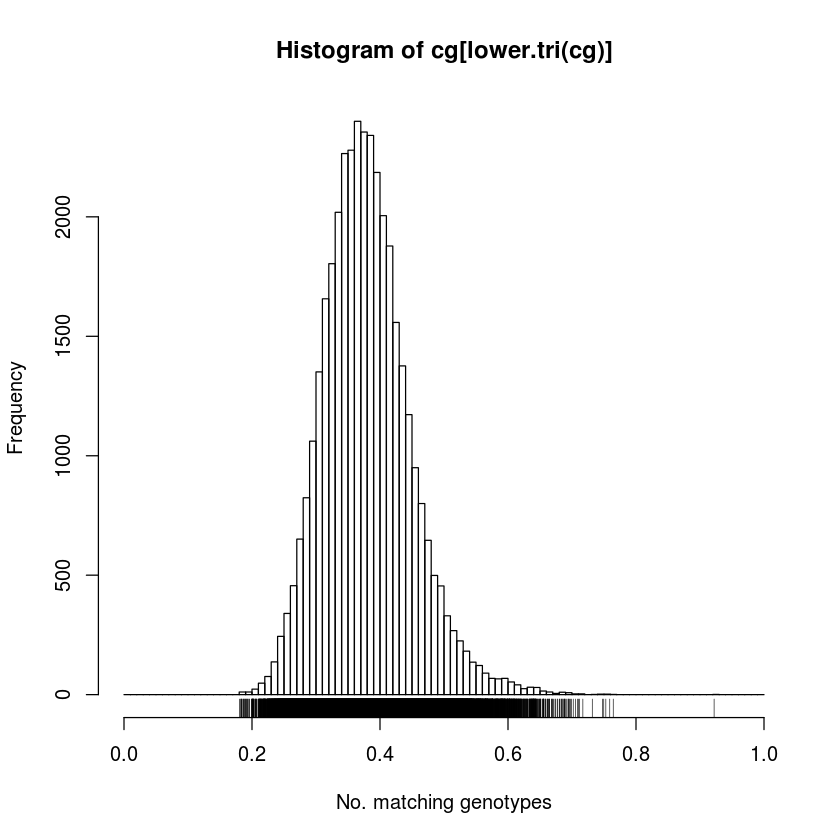

In [18]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [19]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [20]:
wh

row col 
219 245

In [21]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-14`
[1] "1-6"  "1-7"  "1-8"  "1-9"  "1-10" "1-11" "1-12" "1-13"

$`1-15`
[1] "1-16" "1-17" "1-18"

$`1-23`
[1] "1-20" "1-21" "1-22"

$`1-24`
[1] "1-25" "1-26" "1-27"

$`1-32`
[1] "1-29" "1-30" "1-31" "1-33"

$`1-46`
[1] "1-41"

$`1-48`
[1] "1-49"

$`1-69`
[1] "1-66" "1-67" "1-68" "1-70"

$`1-74`
[1] "1-75"

$`1-77`
[1] "1-78"

$`1-79`
[1] "1-80" "1-81"

$`1-84`
[1] "1-85"

$`1-86`
[1] "1-87"

$`1-88`
[1] "1-89"

$`1-93`
[1] "1-94" "1-95" "1-96"

$`1-97`
[1] "1-98" "1-99"

$`1-103`
[1] "1-101" "1-102"

$`1-104`
[1] "1-105"

$`1-109`
[1] "1-107" "1-108"

$`1-115`
[1] "1-114"

$`1-119`
[1] "1-120" "1-121"

$`1-124`
[1] "1-123"

$`1-128`
[1] "1-129"

$`1-139`
[1] "1-138"

$`1-144`
[1] "1-145"

$`1-151`
[1] "1-149" "1-150" "1-152" "1-153" "1-154"

$`1-156`
[1] "1-157"

$`1-160`
[1] "1-158" "1-159"

$`1-161`
[1] "1-162"

$`1-164`
[1] "1-165" "1-166"

$`1-169`
[1] "1-168"

$`1-182`
[1] "1-179" "1-181"

$`2-1`
[1] "2-2"

$`2-17`
[1] "2-18"

$`2-22`
[1] "2-20" "2-21"

$`2-32`
[1] "2-31"

$`

In [22]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
"Sex column should be coded as 0=female 1=male; sex ignored."

In [23]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-2,1,49,31,87,108,0,0,1.019566e-14
1-3,1,15,29,94,137,0,0,1.539216e-24
1-4,1,10,33,92,140,0,0,7.254402e-25
1-5,1,45,30,88,112,0,0,3.551778e-16
1-6,1,46,30,88,111,0,0,7.826526e-16
1-7,1,46,30,88,111,0,0,7.826526e-16
1-8,1,46,30,88,111,0,0,7.826526e-16
1-9,1,46,30,88,111,0,0,7.826526e-16
1-10,1,46,30,88,111,0,0,7.826526e-16
1-11,1,40,31,93,111,0,0,8.990992e-15


In [24]:
length(todrop)

[1] 371

In [25]:
datf2.3 <- datf2.2

In [ ]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

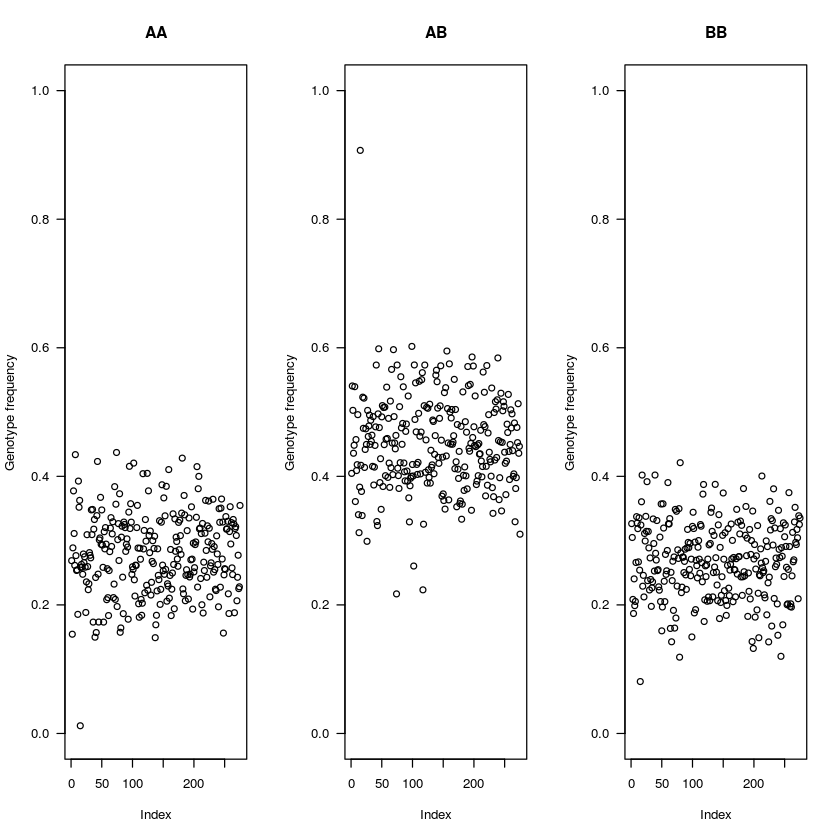

In [26]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [27]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [28]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [29]:
datf2.4 <- datf2.3

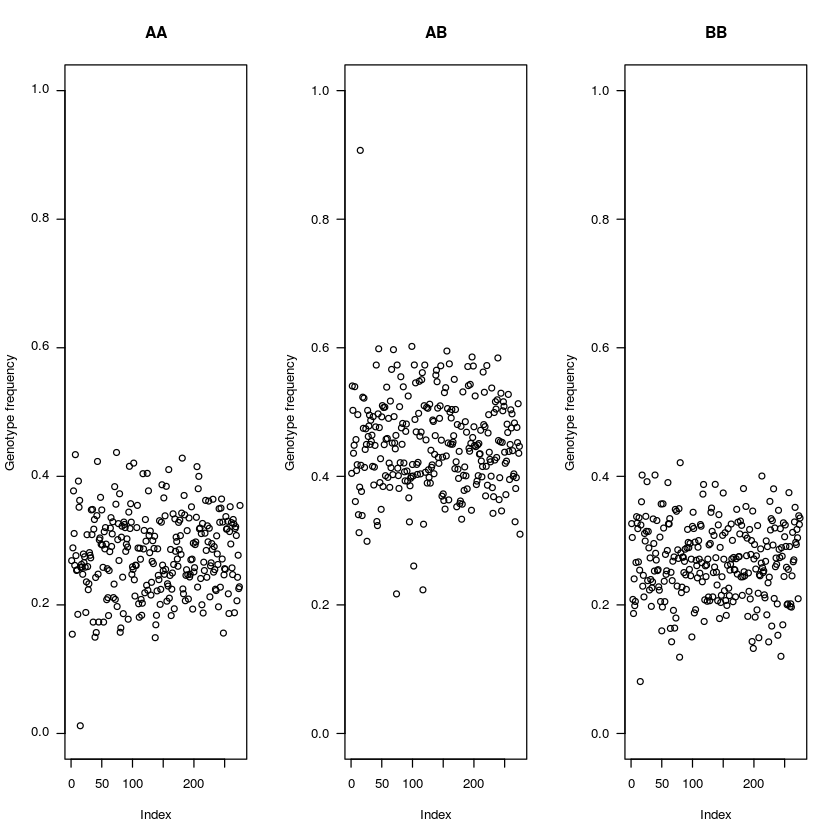

In [30]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [ ]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

Warning message in pull.rf(datf2.4):
" -Running est.rf"Warning message in pull.rf(datf2.4, what = "lod"):
" -Running est.rf"

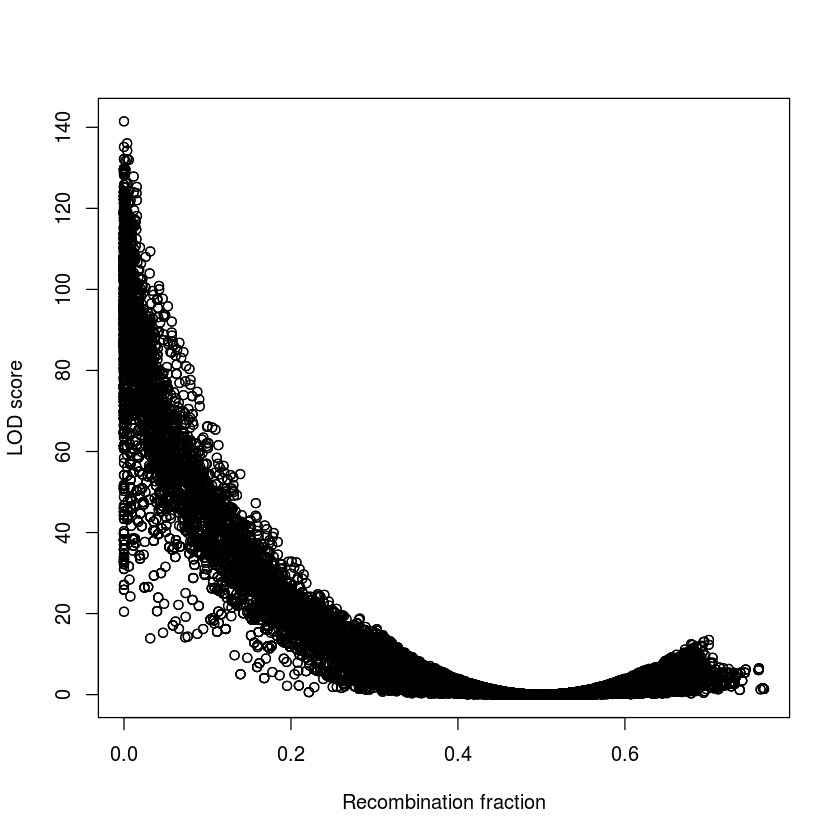

In [31]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

Warning message in plotRF(datf2.4, alternate.chrid = TRUE):
"Running est.rf."

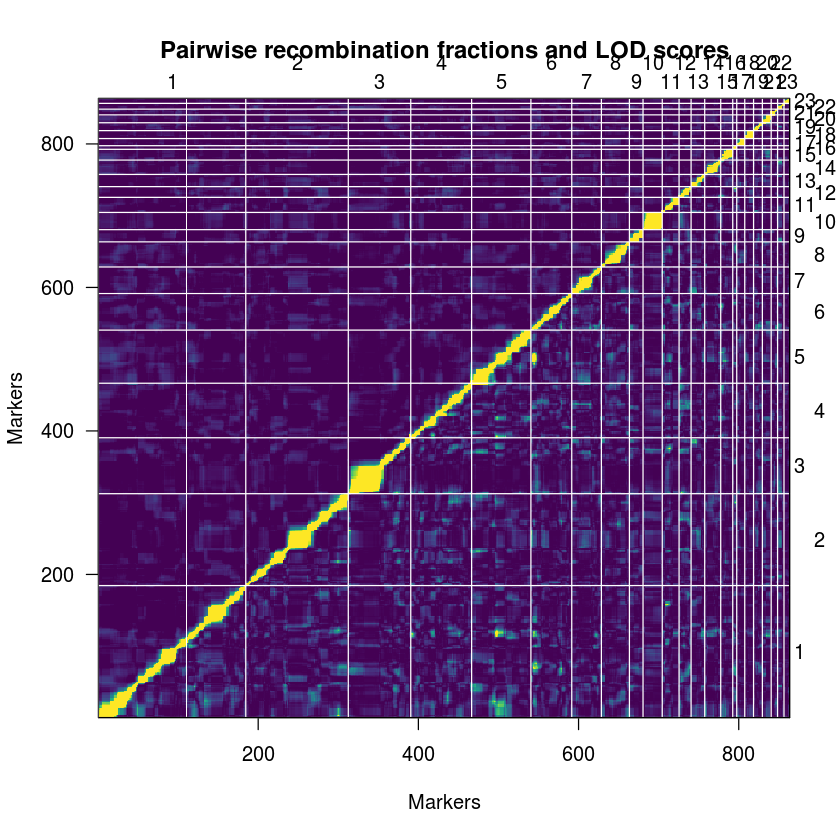

In [32]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [33]:
datf2.5 <- datf2.4

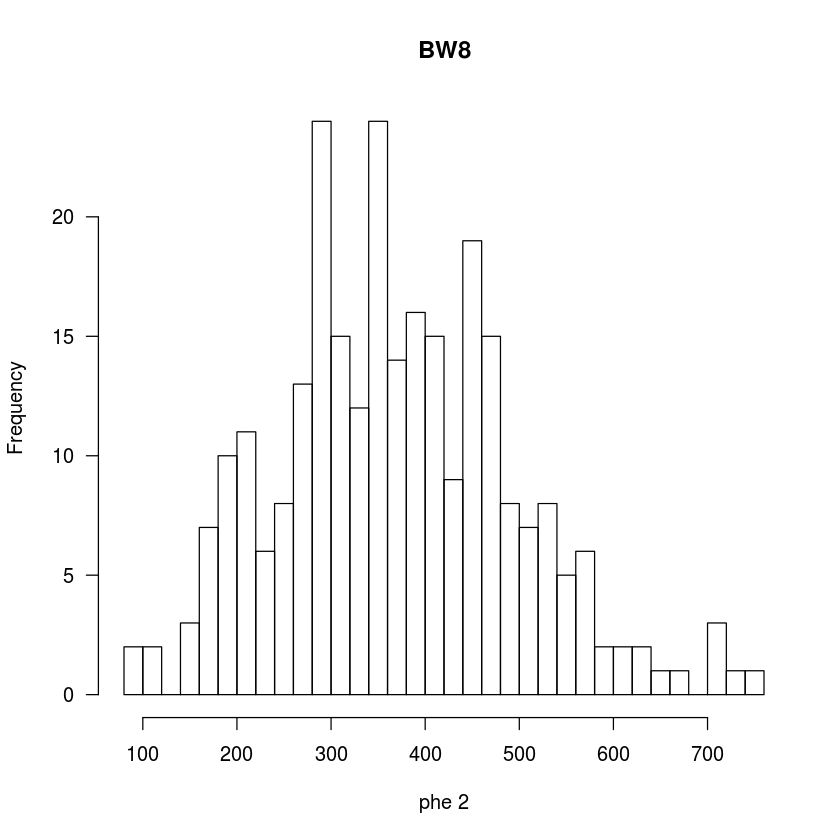

In [34]:
plotPheno(datf2.5, pheno.col =2 )

In [35]:
#plotMissing(datf2.5, reorder=TRUE)

In [36]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [37]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [38]:
out.em <- scanone(datf2.5, pheno.col = 2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 3 individuals with missing phenotypes.
"

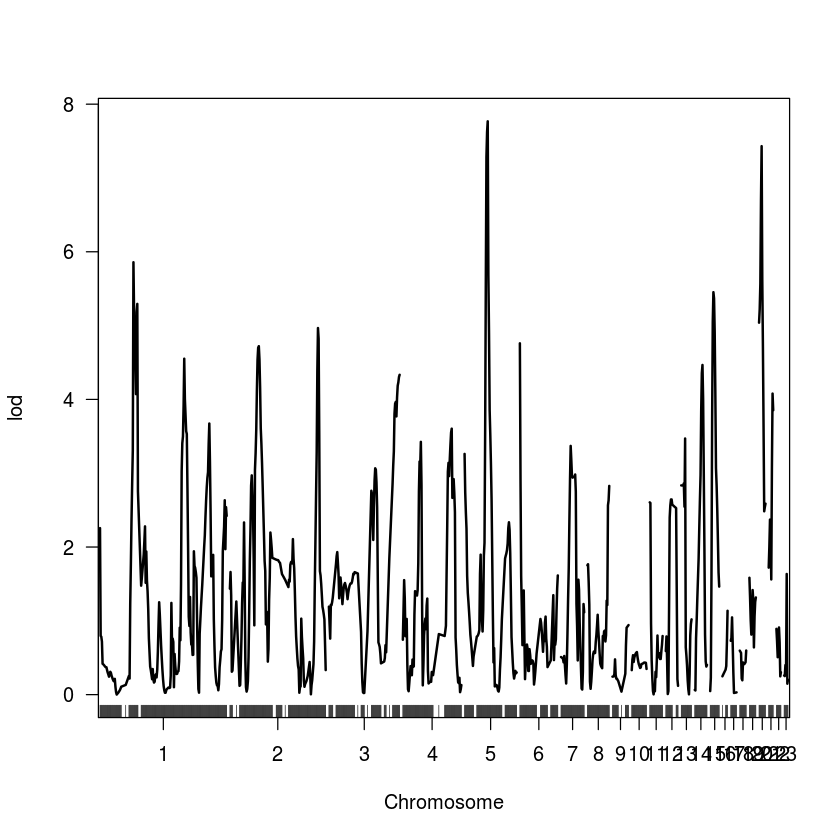

In [39]:
plot(out.em)

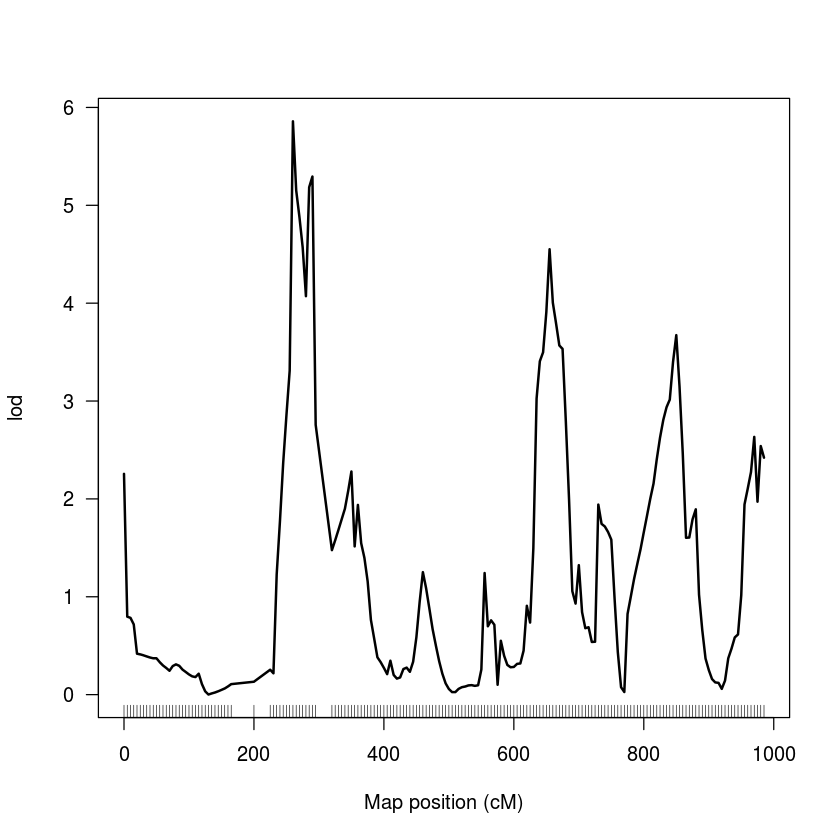

In [40]:
plot(out.em,chr=1)

In [41]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [42]:
ac2 <- pull.pheno(datf2.5, c("SEX","DAM","SIRE"))

In [49]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 3 individuals with missing phenotypes.
"

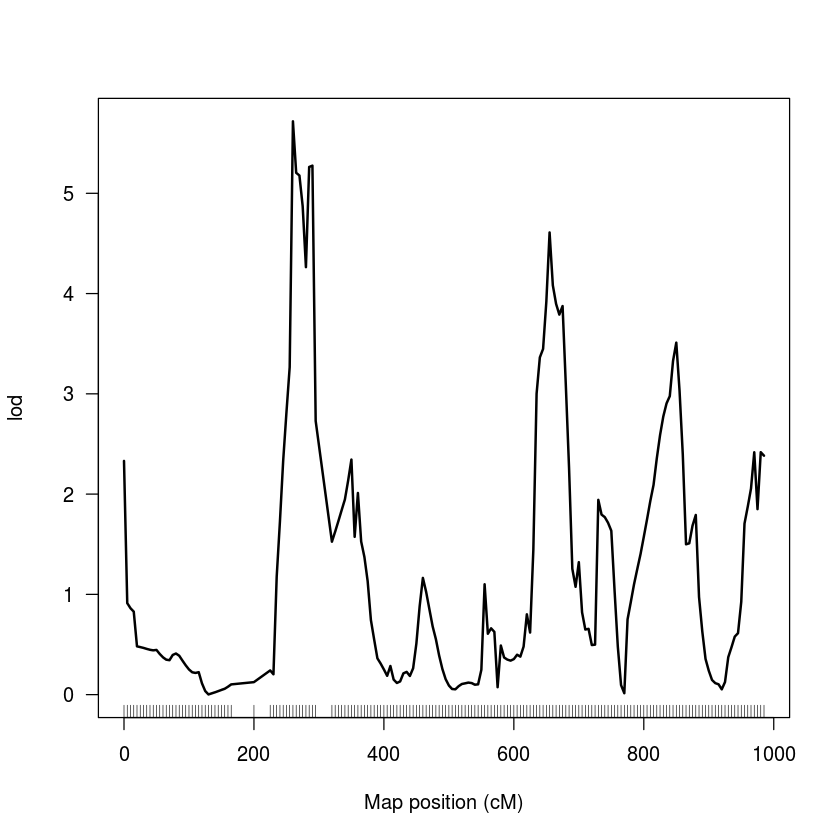

In [50]:
plot(out.acovar, chr=1)

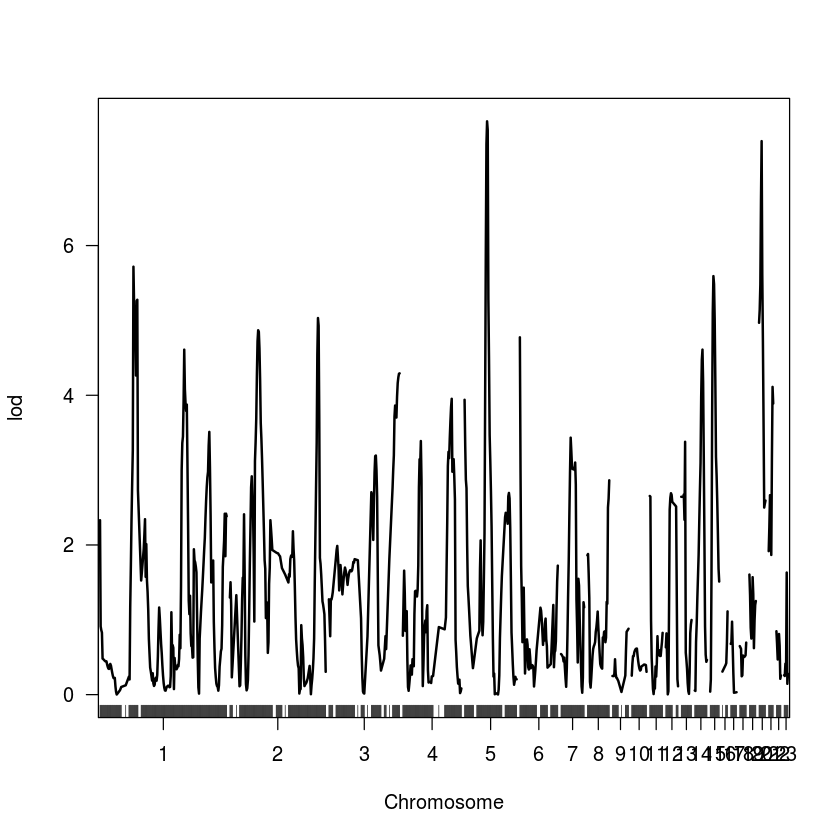

In [45]:
plot(out.acovar)

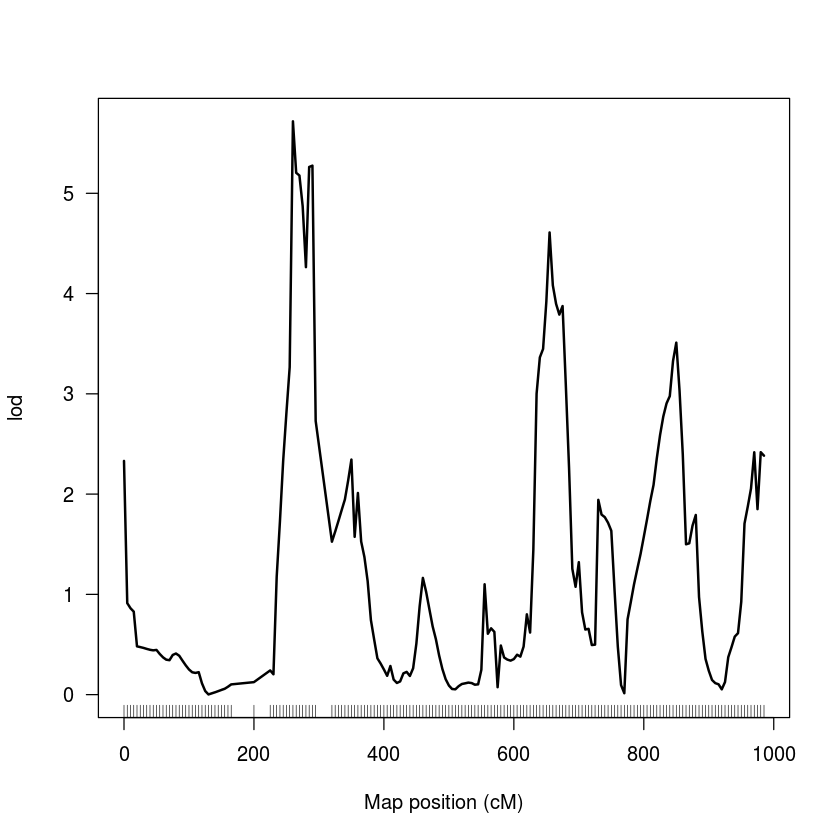

In [51]:
plot(out.acovar, chr=1)

In [52]:
out.acovar

,chr,pos,lod
1-1,1,0,2.330908002
1-2,1,5,0.912369187
1-3,1,10,0.861899453
1-4,1,15,0.828275692
1-5,1,20,0.481620989
1-6,1,25,0.474637960
1-7,1,30,0.466216646
1-8,1,35,0.456628737
1-9,1,40,0.447558262
1-10,1,45,0.442314543


In [53]:
write.csv(out.acovar, "20190828_out_f8_bw8_ctrlsex.csv")